# Machine Learning

In this part we will assess ML model

# Final modeling with Extracted Features from EDA

- Linear Regression
- Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data=pd.read_csv('../dataset/extracted/feature_extracted.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,...,NumTopCrew,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,CountryRank,LanguageRank,keywordRank,cerRank
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac',...","['Lawrence Kasdan', 'Michael Arndt', 'J.J. Abr...","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...","['Action', 'Adventure', 'Sci-Fi']","['reboot', 'sanitation employee', 'remake', 'c...",['English'],['United States'],...,3,1,3,775,2,1,4,1,158,4
1,Frozen II,4520988,150000000,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...","['Jennifer Lee', 'Hans Christian Andersen', 'C...","['Walt Disney Animation Studios', 'Walt Disney...","['Animation', 'Adventure', 'Comedy', 'Family',...","['autumn', 'anthropomorphic snowman', 'princes...",['English'],['United States'],...,0,0,2,740,2,1,4,1,165,2


In [2]:
data.columns

Index(['Movie_Title', 'Movie_ID', 'Budget', 'Cast', 'Crew', 'Studios', 'Genre',
       'Keywords', 'Languages', 'Countries', 'Release_Data', 'Runtime',
       'Gross_worldwide', 'Rating', 'Rating_Count', 'ListOfCertificate',
       'Release_Year', 'Release_Month', 'Release_Day', 'GenreRank', 'IsFriWed',
       'SpecialMonth', 'CastsRank', 'NumLeadActors', 'HasTop50Actors',
       'NumCrews', 'crewsTeamRank', 'NumTopCrew', 'HasTopCrew', 'NumStudios',
       'StudioRank', 'NumTopStudios', 'HasTopStudio', 'CountryRank',
       'LanguageRank', 'keywordRank', 'cerRank'],
      dtype='object')

Drop **str** column

In [3]:
for index in data.columns:
    if type(data[index][0])== str:
        data=data.drop(index,axis=1)
data.head(2)

,Movie_ID,Budget,Runtime,Gross_worldwide,Rating,Rating_Count,Release_Year,Release_Month,Release_Day,GenreRank,...,NumTopCrew,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,CountryRank,LanguageRank,keywordRank,cerRank
0,2488496,245000000,138,2069521700,7.8,893000,2015,12,18,16.333333,...,3,1,3,775,2,1,4,1,158,4
1,4520988,150000000,103,1450026933,6.8,156000,2019,11,22,16.333333,...,0,0,2,740,2,1,4,1,165,2


Correlation Plot

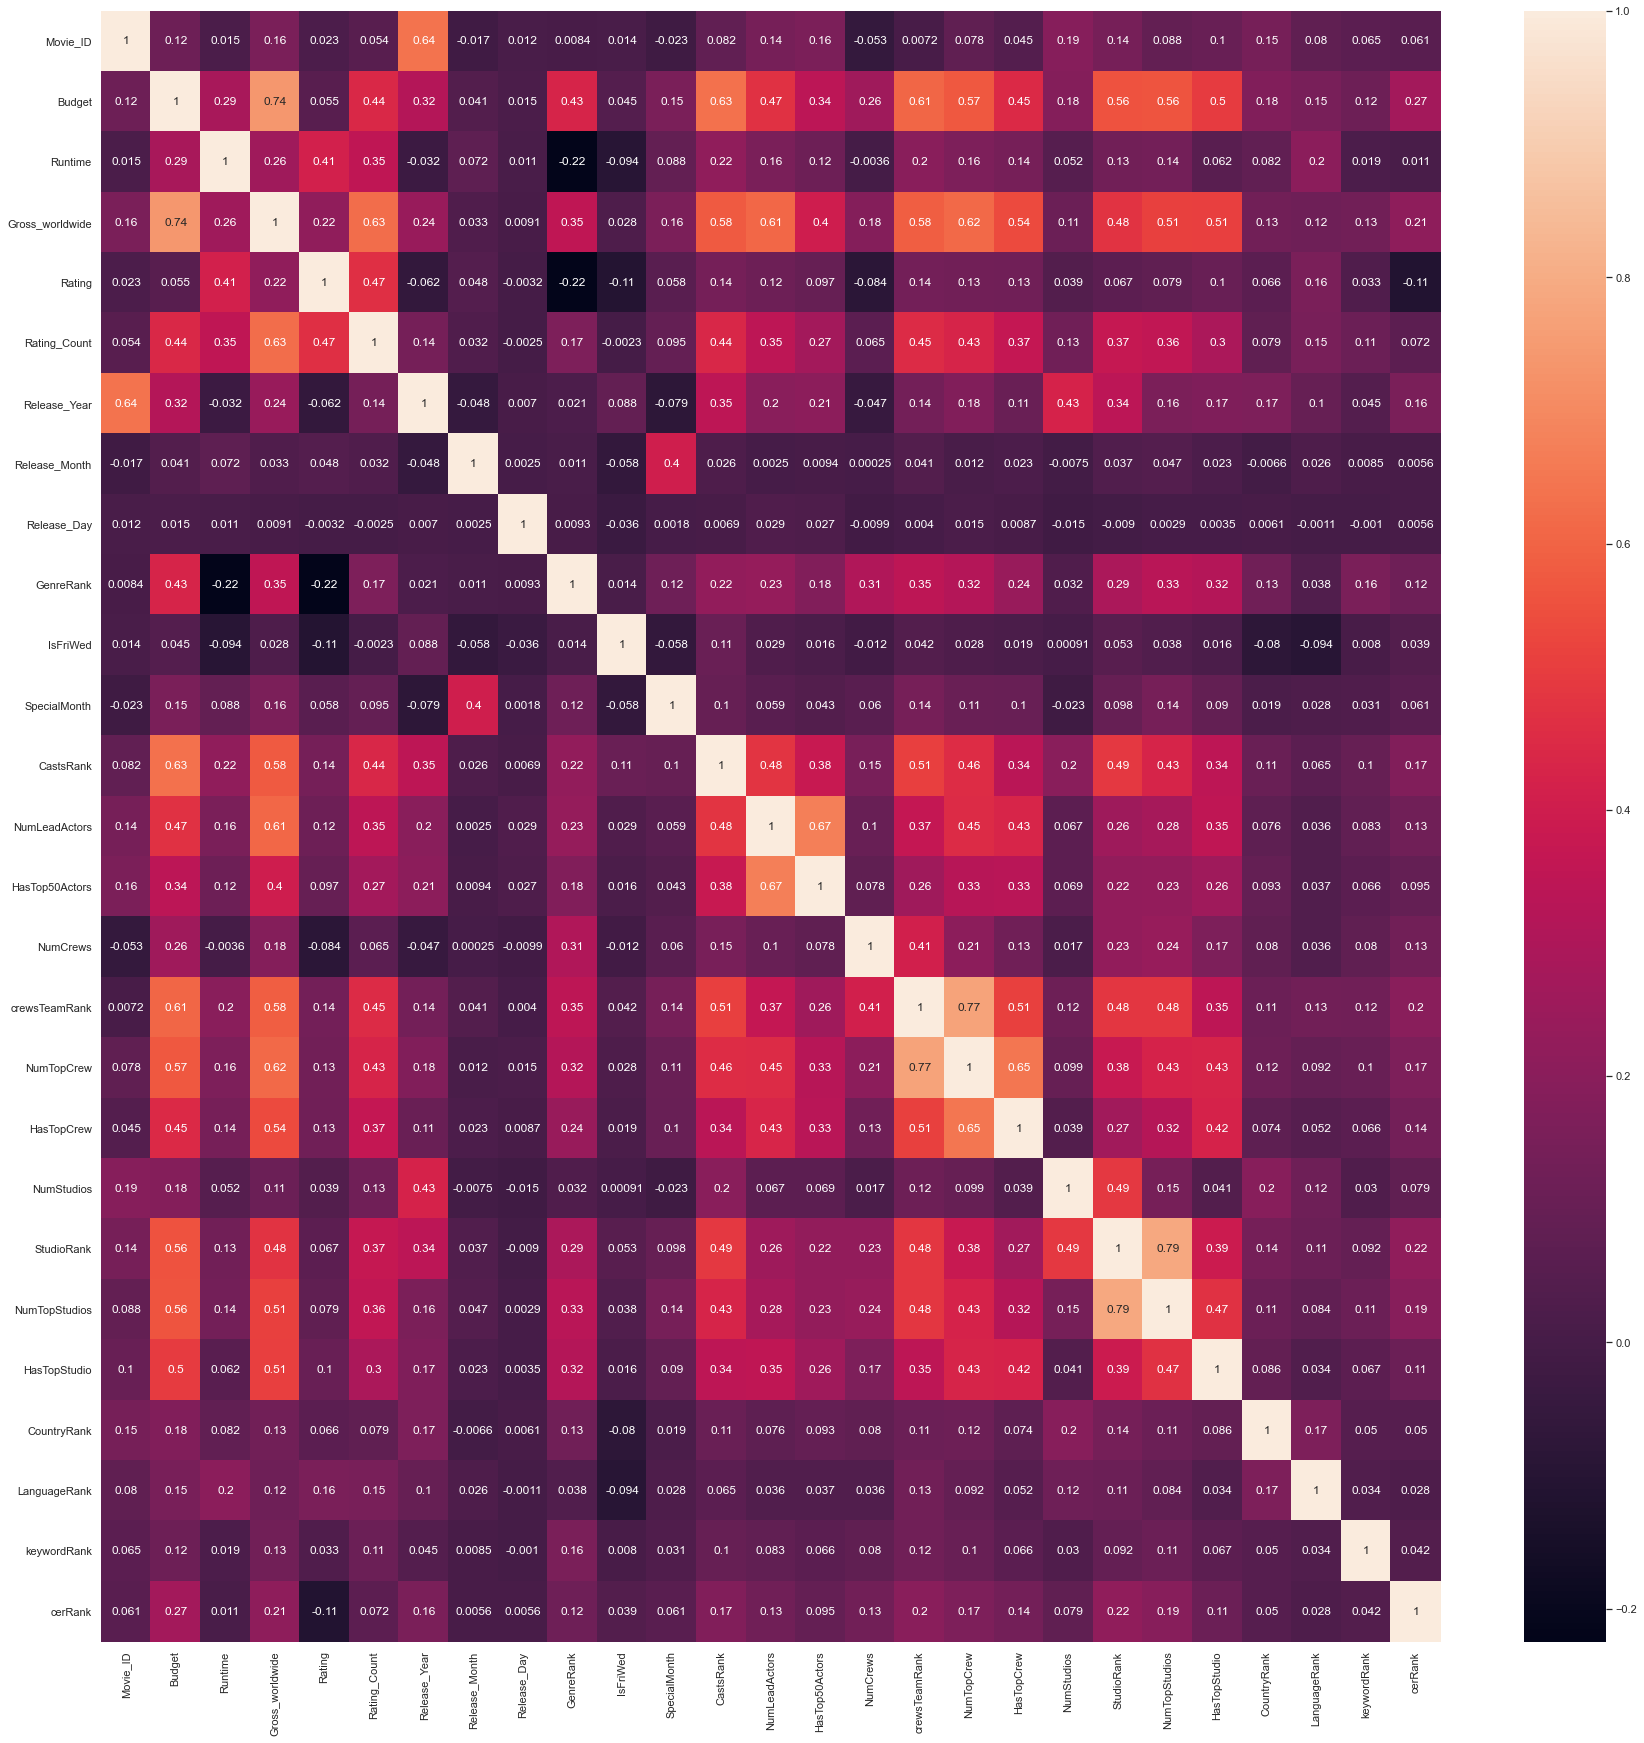

In [4]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)
plt.show()

Top correlation with **Gross_worldwide**

In [6]:
data.corr()['Gross_worldwide'].sort_values(ascending=False)

Gross_worldwide    1.000000
Budget             0.738403
Rating_Count       0.626411
NumTopCrew         0.616953
NumLeadActors      0.611519
crewsTeamRank      0.584161
CastsRank          0.575233
HasTopCrew         0.538546
NumTopStudios      0.513710
HasTopStudio       0.508838
StudioRank         0.477371
HasTop50Actors     0.400090
GenreRank          0.351359
Runtime            0.260496
Release_Year       0.240060
Rating             0.215990
cerRank            0.213945
NumCrews           0.184700
SpecialMonth       0.162670
Movie_ID           0.156227
CountryRank        0.133616
keywordRank        0.129740
LanguageRank       0.122013
NumStudios         0.112112
Release_Month      0.032586
IsFriWed           0.028230
Release_Day        0.009120
Name: Gross_worldwide, dtype: float64

In [7]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


Put into model
- Linear Regression

In [15]:
testScore=0
mae_val=0
rmae=0
for i in range(10):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    target=['Gross_worldwide']
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=10
    mae_val/=10
    rmae/=10
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.75
MAE:  51797349.83177616
RMAE:  89808437.88021705


- Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
testScore=0
mae_val=0
rmae=0
loop=1
for i in range(loop):
    lin=RandomForestRegressor(n_estimators=100)
    train, test = train_test_split(data,test_size=0.3)
    target=['Gross_worldwide']
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=loop
    mae_val/=loop
    rmae/=loop
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.77
MAE:  42304719.23284261
RMAE:  88957607.48914798


MAE of test is from 42M$ to 46M$ ~ 1000 Tỷ Vietnam Dong

# Modeling with out EDA (Deprecated)

## Initialization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data=pd.read_csv('../dataset/processed/cleanedData.csv')
data.head(2)

Load list fields

In [ ]:
import ast
cols =['Cast', 'Genre', 'Studios', 'ListOfCertificate','Keywords', 'Languages', 'Countries']
for col in cols:
    data[col]=data[col].apply(ast.literal_eval)

## Linear Regression with only NUMBER attributes

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

First we will use only the fields that contain NUMBER with higher correlation(Ignore all field with STRING, LIST )

To see how the model performs

### With only Budget, Runtime and Release_Year

In [ ]:
testScore=0
mae_val=0
rmae=0
for i in range(500):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    feature=['Budget','Runtime','Release_Year']
    target=['Gross_worldwide']
    x_train = train[feature]
    y_train = train[target]
    x_test = test[feature]
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=500
    mae_val/=500
    rmae/=500
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.54
MAE:  67629525.57754299
RMAE:  123882387.82051133


### With **Rating** and **Rating_Count**

In [ ]:
testScore=0
mae_val=0
rmae=0
for i in range(500):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    feature=['Budget','Runtime','Release_Year','Rating','Rating_Count']
    target=['Gross_worldwide']
    x_train = train[feature]
    y_train = train[target]
    x_test = test[feature]
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=500
    mae_val/=500
    rmae/=500
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.66
MAE:  58079935.36079664
RMAE:  108932653.37124848


MAE and RMAE decrease

### With Normalization

In [ ]:
testScore=0
mae_val=0
rmae=0
for i in range(500):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    feature=['Budget','Runtime','Release_Year','Rating','Rating_Count']
    target=['Gross_worldwide']
    x_train = train[feature]
    y_train = train[target]
    x_test = test[feature]
    y_test = test[target]
    scale = MinMaxScaler().fit(x_train)
    x_train = scale.transform(x_train)
    x_test = scale.transform(x_test)
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=500
    mae_val/=500
    rmae/=500
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.65
MAE:  58173231.38394031
RMAE:  108796930.37995012


We can see that Normalization does not affect the result.

In some situations it may reduce the weight of calculation

### With Standardization

In [ ]:
testScore=0
mae_val=0
rmae=0
for i in range(500):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    feature=['Budget','Runtime','Release_Year','Rating','Rating_Count']
    target=['Gross_worldwide']
    x_train = train[feature]
    y_train = train[target]
    x_test = test[feature]
    y_test = test[target]
    scale2=StandardScaler().fit(x_train)
    x_train = scale2.transform(x_train)
    x_test = scale2.transform(x_test)
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=500
    mae_val/=500
    rmae/=500
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.66
MAE:  58183206.27748618
RMAE:  108575666.12740506


We can see that Standardization also does not affect the result.

## Linear Regression with One Hot Extraction

Cast Genre Studios ListOfCertificate Keywords Languages Countries
 
Those fields we need to apply feature extraction


### One hot coding


In [ ]:
def oneHotCoding(dataframe,column,top=10,devide=False,getby='Average'):
    newdata=dataframe.copy()
    result = []
    count = []
    gross = []
    for i,record in enumerate(newdata[column]):
      for x in record:
          result.append(x)
          if devide:
            gross.append(newdata['Gross_worldwide'][i]/len(record))
          else:
            gross.append(newdata['Gross_worldwide'][i])
          count.append(1)
    t = pd.DataFrame({column:result, 'Money':gross, 'Count':count})
    result = t.groupby(column).sum()
    result=result.reset_index()
    result=result.assign(Average=result['Money']/result['Count'])
    result=result.sort_values(by=getby,ascending=False)
    types=set(result[column][0:top])
    for word in types:
        newdata[word]=0
    for i, row in enumerate(newdata[column]):
        for part in row:
            if part in types:
                newdata.loc[i,part]=1
    newdata.drop(column,axis=1,inplace=True)
    return newdata

### Dummies multivalued attributes

In [ ]:
data2=data.copy()
data2=oneHotCoding(data2,'Genre',top=7,devide=False,getby='Average')
data2=oneHotCoding(data2,'Crew',top=30,devide=False,getby='Average')
data2=oneHotCoding(data2,'Cast',top=20,devide=False,getby='Average')
data2=oneHotCoding(data2,'Studios',top=20,devide=True,getby='Average')
data2=oneHotCoding(data2,'ListOfCertificate',top=20,devide=False,getby='Average')
data2=oneHotCoding(data2,'Keywords',top=30,devide=False,getby='Average')
data2=oneHotCoding(data2,'Languages',top=30,devide=False,getby='Money')
data2=oneHotCoding(data2,'Countries',top=20,devide=False,getby='Average')
data2=data2.drop(['Movie_Title','Movie_ID','Release_Data','Release_Day'],axis=1)
data2.head(1)

,Budget,Runtime,Gross_worldwide,Rating,Rating_Count,Release_Year,Release_Month,Family,Adventure,Musical,...,Peru,Fiji,Antarctica,Thailand,Slovenia,Morocco,Bahamas,Turkey,Australia,Malta
0,245000000,138,2069521700,7.8,893000,2015,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Now we will one hot month

In [ ]:
def dummiesSpecialDay(month):
    specialMonth = [5,6,7,11,12]
    if month in specialMonth:
        return 1
    else:
        return 0
##Dummies special day
data2['Release_Month']=data2['Release_Month'].apply(dummiesSpecialDay)

Now we will put into model

In [ ]:
testScore=0
mae_val=0
rmae=0
loop=100
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data2,test_size=0.3)
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train['Gross_worldwide']
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test['Gross_worldwide']
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=loop
    mae_val/=loop
    rmae/=loop
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.68
MAE:  54927637.63436937
RMAE:  104446508.55028911


MAE of test set reduce a little bit

## Ridge Regression

We will test with alpha = [0.1, 1, 10, 100, 1000]

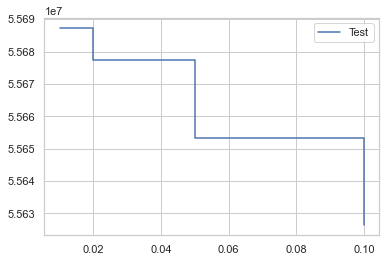

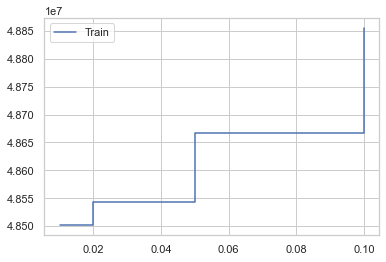

In [ ]:
alphas = [0.01, 0.02 ,0.05, 0.1]
resultMAE_train=[]
resultMAE_test= []
train, test = train_test_split(data2,test_size=0.3)
x_train = train.drop('Gross_worldwide',axis=1)
y_train = train['Gross_worldwide']
x_test = test.drop('Gross_worldwide',axis=1)
y_test = test['Gross_worldwide']

for alpha in alphas:
    lasso=linear_model.Ridge(alpha=alpha)
    lasso.fit(x_train,y_train)
    y_predicted= lasso.predict(x_test)
    y_train_predicted=lasso.predict(x_train)
    resultMAE_train.append(mean_absolute_error(y_train,y_train_predicted))
    resultMAE_test.append(mean_absolute_error(y_test,y_predicted))
plt.plot(alphas,resultMAE_test,label='Test',drawstyle="steps-post")
plt.legend()
plt.show()
plt.plot(alphas,resultMAE_train,label='Train',drawstyle="steps-post")
plt.legend()
plt.show()


We choose alpha = 0.1

In [ ]:
testScore=0
mae_val=0
rmae=0
loop=100
for i in range(loop):
    lin=linear_model.Ridge(alpha=0.1)
    train, test = train_test_split(data2,test_size=0.3)
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train['Gross_worldwide']
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test['Gross_worldwide']
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=loop
    mae_val/=loop
    rmae/=loop
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.68
MAE:  54993908.649318956
RMAE:  104239261.25296117


In [ ]:
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,Release_Data,Runtime,Gross_worldwide,Rating,Rating_Count,ListOfCertificate,Release_Year,Release_Month,Release_Day
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"[Daisy Ridley, John Boyega, Oscar Isaac, Domhn...","['Lawrence Kasdan', 'Michael Arndt', 'J.J. Abr...","[Lucasfilm, Bad Robot, Truenorth Productions]","[Action, Adventure, Sci-Fi]","[reboot, sanitation employee, remake, crash la...",[English],[United States],2015-12-18,138,2069521700,7.8,893000,[PG-13],2015,12,18
1,Frozen II,4520988,150000000,"[Kristen Bell, Idina Menzel, Josh Gad, Jonatha...","['Jennifer Lee', 'Hans Christian Andersen', 'C...","[Walt Disney Animation Studios, Walt Disney Pi...","[Animation, Adventure, Comedy, Family, Fantasy...","[autumn, anthropomorphic snowman, princess, di...",[English],[United States],2019-11-22,103,1450026933,6.8,156000,[PG],2019,11,22


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
testScore=0
mae_val=0
rmae=0
loop=5
for i in range(loop):
    lin=RandomForestRegressor(n_estimators=100)
    train, test = train_test_split(data2,test_size=0.3)
    target=['Gross_worldwide']
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=loop
    mae_val/=loop
    rmae/=loop
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.76
MAE:  43982616.93060683
RMAE:  91143264.1727163
